In [1]:
# load data
library("Synth")
data("basque")
head(basque)

##
## Synth Package: Implements Synthetic Control Methods.

## See http://www.mit.edu/~jhainm/software.htm for additional information.




regionno,regionname,year,gdpcap,sec.agriculture,sec.energy,sec.industry,sec.construction,sec.services.venta,sec.services.nonventa,school.illit,school.prim,school.med,school.high,school.post.high,popdens,invest
1,Spain (Espana),1955,2.354542,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1956,2.480149,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1957,2.603613,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1958,2.637104,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1959,2.669880,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1960,2.869966,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [2]:
dataprep.out <- dataprep(foo = basque, predictors = c("school.illit", "school.prim", "school.med", "school.high", "school.post.high", "invest"), predictors.op = "mean", time.predictors.prior = 1964:1969, special.predictors = list(list("gdpcap", 1960:1969 , "mean"), list("sec.agriculture", seq(1961, 1969, 2), "mean"),
list("sec.energy", seq(1961, 1969, 2), "mean"),
list("sec.industry", seq(1961, 1969, 2), "mean"),
list("sec.construction", seq(1961, 1969, 2), "mean"),
list("sec.services.venta", seq(1961, 1969, 2), "mean"),
list("sec.services.nonventa", seq(1961, 1969, 2), "mean"),
list("popdens", 1969, "mean")),
dependent = "gdpcap",
unit.variable = "regionno",
unit.names.variable = "regionname",
time.variable = "year",
treatment.identifier = 14,
controls.identifier = c(2:13, 15:16, 18),
time.optimize.ssr = 1960:1969,
time.plot = 1955:1997)

In [3]:
synth.out <- synth(data.prep.obj = dataprep.out, method = "BFGS")

synth.tables <- synth.tab(dataprep.res = dataprep.out,synth.res = synth.out)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.7209181 

solution.v:
 0.05343497 0.0121308 0.08151981 0.05309881 0.06651345 0.07808911 0.261331 0.09139274 0.03624163 0.03912748 0.01813165 0.08133689 0.02373037 0.1039213 

solution.w:
 5.929e-07 1.123e-07 1.222e-07 0.04087338 1.0595e-06 2.69e-08 1.823e-07 7.34e-08 0.9591236 1.817e-07 8.57e-08 1.869e-07 2.062e-07 1.018e-07 1.011e-07 



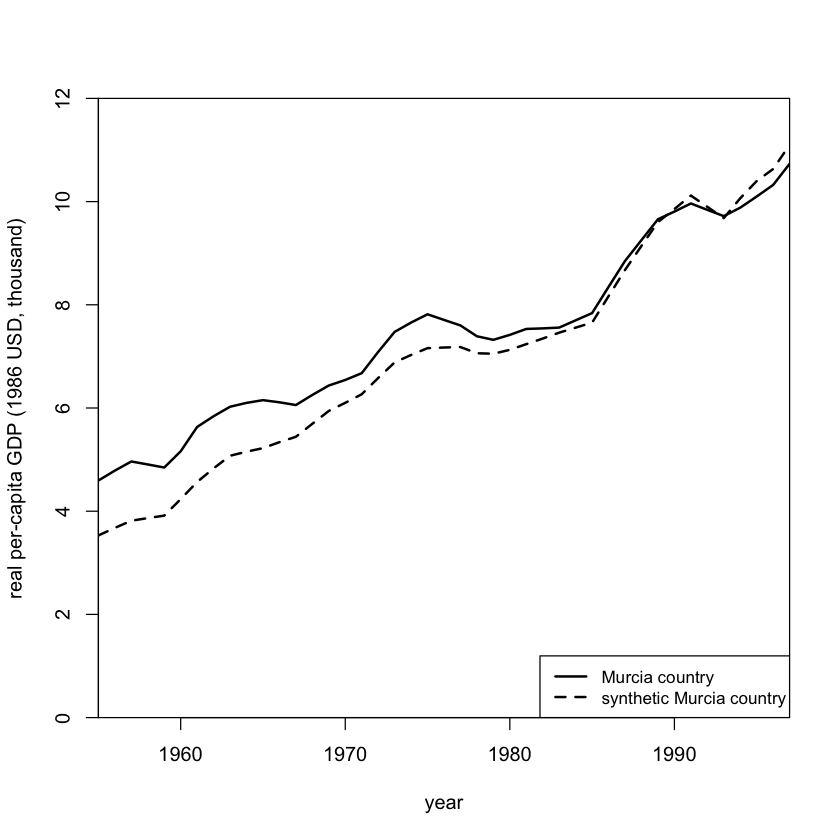

In [5]:
path.plot(synth.res = synth.out, dataprep.res = dataprep.out,
Ylab = "real per-capita GDP (1986 USD, thousand)", Xlab = "year",
Ylim = c(0, 12), Legend = c("Murcia country",
"synthetic Murcia country"), Legend.position = "bottomright")